# Pymaceuticals Inc.
---

### Analysis

- The data collected for this analysis recorded the results of an assortment of cancer treatment regimens applied to multiple groups of lab mice. The qualitative characteristics of each mice were recorded before actually undergoing their designated treatment; including: weight, sex, age, and an assigned ID code. This data was then merged with the data collected on each mouse’s: tumor volume (mm3) at certain timepoints (days), the apparent metastatic sites, and the regimen they were undertaking.

- Using the given data, a summary statistics chart was made that described the mean, median, variance, standard deviation, and standard error of the mean for tumor volumes recorded within each drug regimen. The summary statistics data showed that drug regimens Capomulin and Ramicane had the smallest averages in tumor  volume compared to the other drug regimens. The other drug regimens all experienced a similar average tumor volume difference of around 10 (mm3). This would imply that Capomulin and Ramicane were more effective in treating the onset cancer growth, due to their mice experiencing a reduced growth rate in their tumors
 
- In order to check against the possibility that the success of these drug regimens was a result of a lack of data, bar charts were created to determine how many data recordings were made within each drug regimen.  The size of the bar charts depicts how many observed mouse timepoints were found in each regimen, which would allow us to visualize how long the mice were observed while undergoing each regimen. A larger bar would mean the mice were observed for a longer period of time, whereas a smaller bar would mean that the mice were observed for a shorter period of time. This is significant due to the fact that if the tumors grew to a certain threshold, it would not make sense to continue recording data on that particular mouse as the tumor had grown to an unacceptable size. On the other hand, if the tumor continued to be under this threshold, it would make sense to continue to record data on that particular tumor in order to see if it continues to stabilize over time. Given this context, the bar charts confirm the assumption that Capomulin and Ramicane were effective treatments as they both contained more observed mouse timepoints than the other drug regimens. Therefore, their effectiveness can not be disqualified by a lack of data.

- For additional demographic information, a pie chart was made that described the sex distribution of the mouse population used in these drug trials. The pie chart describes a roughly half split in male and female mice within the population. This would imply that, so long as the groups made for each regimen were populated with similar male to female ratios,  the drug regimens effectiveness would not be sex specific. That is to say, the results of the treatment would not be affected by the possibility that the drug may be more or less effective due to an unforeseen reaction to the sex of the mice.

- A box plot was created in order to demonstrate the possibility of outliers in the data. The box plot depicts the distribution of the final tumor volumes for the Capomulin, Ramicane, Infubinol, and Ceftamin regimens. The reason these regimens were used was to display how the two effective regimens would compare to two of the less effective regimens. Out of these regimens, only one outlier was found, which belonged to the Infubinol regimen. It would be prudent to point out that the Capomulin and Ramicane did not experience any outliers which lends more credibility to the results of these two regimens.
In order to dive even deeper into the credibility of the successful regimens, a line graph depicting the Capomulin treatment of mouse l509 was made. This line graph shows how the tumor volume of mouse l509 increased, or decreased, over time after they were given the treatment. The line graph shows that while the tumor continued to grow for twenty days (an increase of around 3  (mm3)), it then began to fall  by around 8 (mm3)  over the course of the next fifteen days. Afterwards, it then began to experience tumor growth again. This graph would then imply that an actual significant reduction in tumor size was made as a result of the Capomulin treatment. If the other mice in this regimen experienced a similar situation, it would explain why the overall regimen had smaller average tumor volume in comparison to the other treatments, for the other treatments may not have been able to slow or reverse the growth of the tumors at 
all. 

- A broader investigation into the Capomulin group involved creating a scatter plot that depicted the correlation and regression of the weight of the mice versus the average tumor volume.  The purpose of this chart is to determine if mouse weight had an affect on the average tumor volume. The correlation between these two values was calculated to be 0.84, which would mean that there is a strong correlation between mouse weight and average tumor volume. The line regression confirms this by allowing us to see a distinct trend in how the greater the weight of a mouse, the greater the average tumor volume it would have. This would mean that the tumor size for each mouse was strongly associated with that mouse’s weight, and therefore a heavier mouse would have a larger tumor and vice versa. In relation to our determination of the effectiveness of the Capomulin group, it would be helpful to conduct more of these correlation calculations for the other drug regimens. If the other drug regimens had similar correlations, it would solidify the fact that weight affects tumor size; but, if they had weak correlations, then it would imply that the tumors were growing out of control in those regimen groups. This would imply that  the correlation between tumor volume and mouse weight was made possible by the Capomulin regulating the growth of these tumors, which would give further proof of its effectiveness.

 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
organized_df = combined_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites",
                            "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
# Display the data table for preview
organized_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
num_mice = organized_df["Mouse ID"].unique()
len(num_mice)

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = organized_df[organized_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
identified_dupli = duplicate_mice["Mouse ID"].unique()
identified_dupli

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_extraction = organized_df.loc[(organized_df["Mouse ID"] =="g989"),:]
mice_extraction

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_mice = organized_df["Mouse ID"] =="g989"
clean_df = organized_df.drop(organized_df[remove_mice].index, inplace = False)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_df["Mouse ID"].unique()
len(num_mice)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_dataframe = pd.DataFrame({"Mean Tumor Volume" : mean_stats,
                                  "Median Tumor Volume" : median_stats,
                                  "Tumor Volume Variance" : var_stats,
                                  "Tumor Volume Std. Dev." : sd_stats,
                                  "Tumor Volume Std. Err." : sem_stats})
summary_dataframe




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

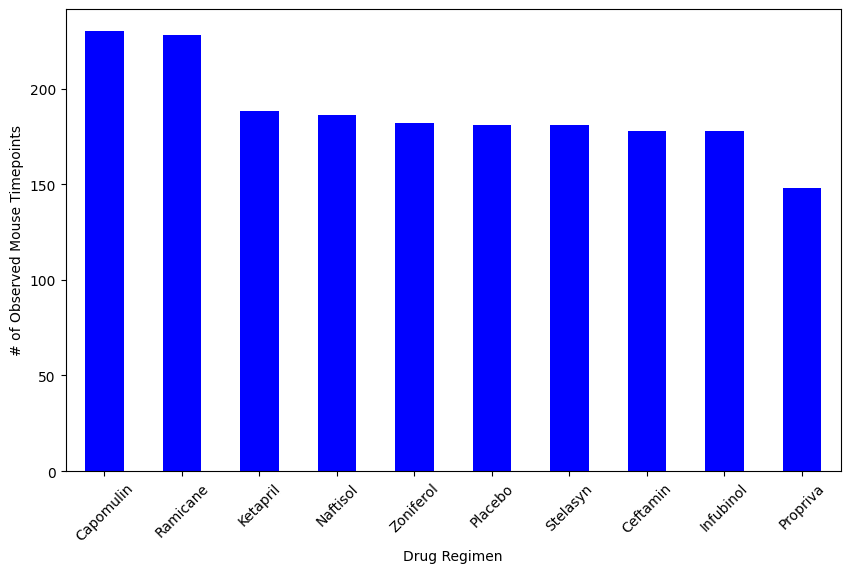

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_size = (clean_df.groupby('Drug Regimen').size()).sort_values(ascending = False)

regimen_size.plot(kind='bar', figsize=(10, 6), rot=0, color='blue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

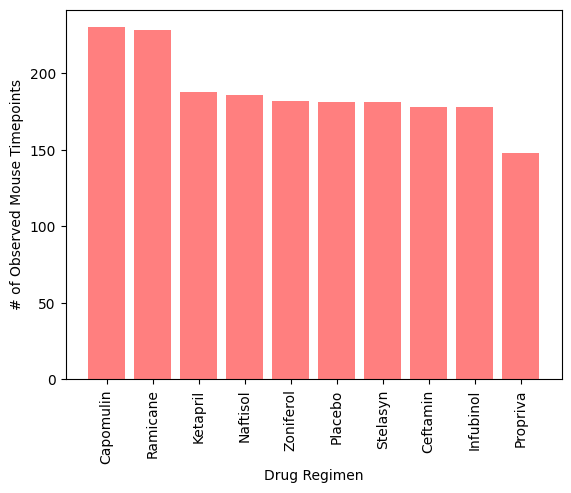

<Figure size 2000x400 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

size_reg = clean_df.groupby("Drug Regimen")["Mouse ID"].size()
size_reg = size_reg.sort_values(ascending = False)
x_axis = size_reg.index
plt.bar(x_axis, size_reg, color = 'red', alpha = 0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.figure(figsize = (20, 4))
plt.show()

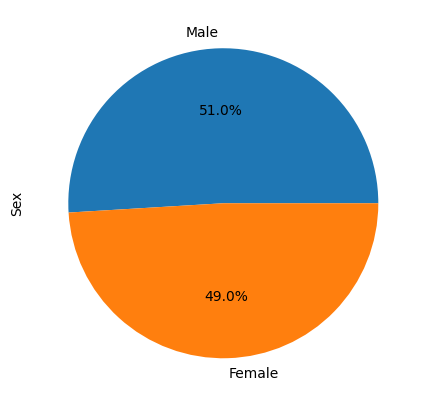

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dist = clean_df["Sex"].value_counts()
gender_dist.plot(kind="pie",autopct='%1.1f%%', figsize = (5,10), startangle = 0)
plt.ylabel("Sex")
plt.show()


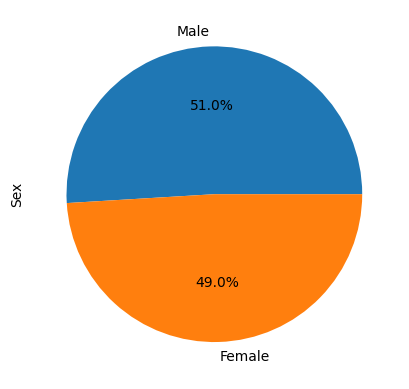

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Male", "Female"]
gender_ratio = gender_dist

plt.pie(gender_ratio, labels=genders, autopct="%1.1f%%", startangle=0)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_mouse = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
max_mouse
# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint\
merged_max_df = pd.merge(max_mouse, clean_df,
                         on =["Mouse ID","Timepoint"],how= "left")
merged_max_df


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    IQR_df = merged_max_df.loc[merged_max_df["Drug Regimen"] ==treatment, "Tumor Volume (mm3)"]
    
    
    # add subset 
    tumor_vol.append(IQR_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = IQR_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    outliers = IQR_df[(IQR_df < lower_bound) | (IQR_df > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


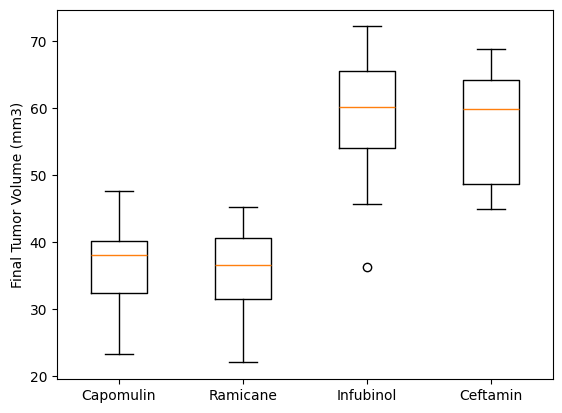

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, tick_labels = treatments)
plt.show()


## Line and Scatter Plots

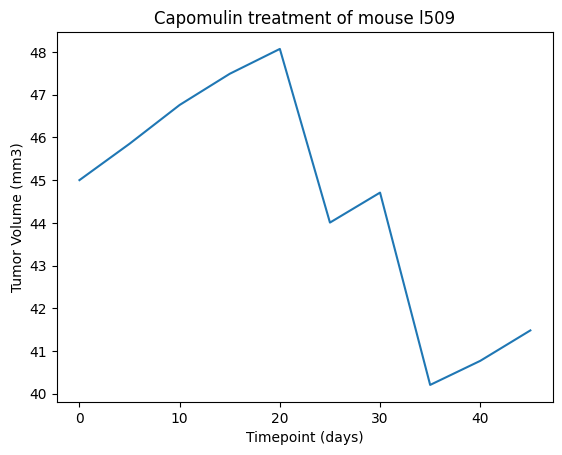

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

target_df = clean_df.loc[(clean_df["Mouse ID"] == "l509"),:]
l509_tumor_vol = target_df["Tumor Volume (mm3)"]
l509_timepoint = target_df["Timepoint"]
plt.plot(l509_timepoint, l509_tumor_vol)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

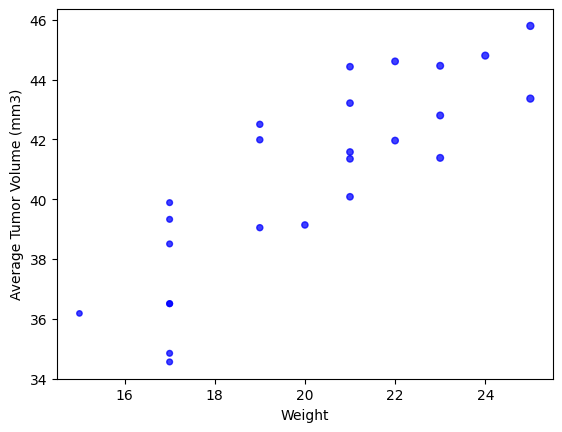

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin"), :]
specify_mouse = cap_df["Mouse ID"].unique()

mouse_weight = cap_df.groupby("Mouse ID")["Weight (g)"].mean()
avg_tum = cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

x_axis_cap = mouse_weight
y_axis_cap = avg_tum
plt.scatter(x_axis_cap, y_axis_cap, marker= 'o', facecolors = 'blue',
            s= x_axis_cap, alpha=0.75)
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


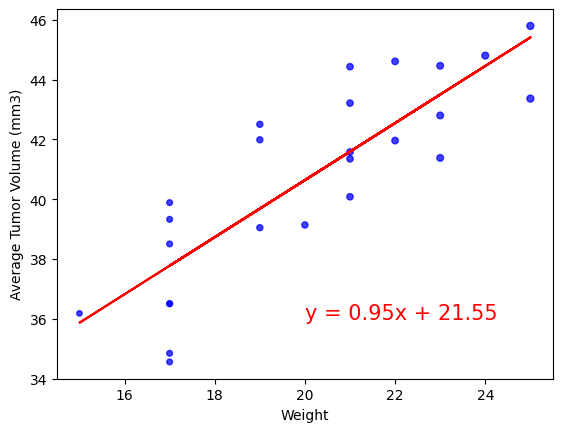

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_axis_cap,y_axis_cap)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_cap, y_axis_cap)
regress_values = x_axis_cap * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_cap, y_axis_cap, marker= 'o', facecolors = 'blue',
            s= x_axis_cap, alpha=0.75)
plt.plot(x_axis_cap,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

plt.show()